In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

/home/rmdstic/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/home/rmdstic/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
df = pd.read_csv('./churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape


(10000, 14)

In [4]:
df.describe


<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [5]:
df.isnull()
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:

def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['yellow', 'blue'], label = ['exited', 'not_exited'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel('No. of customers', fontsize=20)
    plt.legend()

In [11]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

/home/rmdstic/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/rmdstic/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


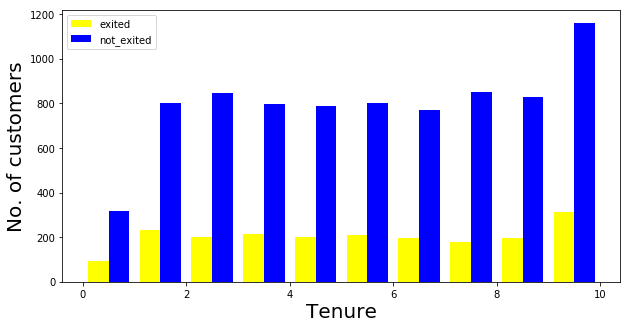

In [12]:
visualization(df_churn_exited, df_churn_not_exited, 'Tenure')


In [13]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

/home/rmdstic/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/rmdstic/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


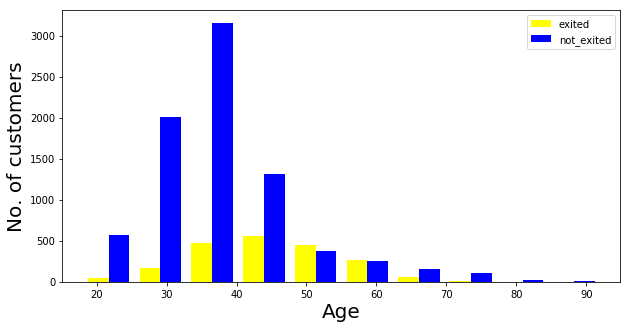

In [14]:
visualization(df_churn_exited2, df_churn_not_exited2, 'Age')


In [15]:
x = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
        'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
states = pd.get_dummies(df['Geography'], drop_first = True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [16]:
df = pd.concat([df,gender,states], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [17]:
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain']]
y = df['Exited']


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [19]:
sc = StandardScaler()


In [20]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/home/rmdstic/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rmdstic/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/rmdstic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [21]:
print('Training Data:\n',x_train)


Training Data:
 [[-1.66303288 -0.75874214 -0.69708328 ...  0.92057219 -0.58460867
   1.74870553]
 [-1.00165043 -1.23634181  0.68220665 ... -1.08628092 -0.58460867
  -0.57185157]
 [ 0.12476655 -0.6632222   1.02702913 ...  0.92057219  1.71054596
  -0.57185157]
 ...
 [ 1.08583792  0.19645722  0.33738417 ...  0.92057219  1.71054596
  -0.57185157]
 [-0.01991086 -0.6632222   0.68220665 ... -1.08628092 -0.58460867
   1.74870553]
 [ 0.58980109  0.19645722 -0.00743831 ... -1.08628092 -0.58460867
   1.74870553]]


In [22]:

print('Testing Data:\n',x_test)

Testing Data:
 [[ 2.05724339  0.00541734 -1.04190576 ... -1.08628092 -0.58460867
  -0.57185157]
 [-0.69162741  0.76957683  0.68220665 ...  0.92057219  1.71054596
  -0.57185157]
 [-0.5572841  -1.23634181  1.02702913 ... -1.08628092 -0.58460867
  -0.57185157]
 ...
 [ 1.68521577  0.48301702  1.02702913 ...  0.92057219  1.71054596
  -0.57185157]
 [-0.99131633  0.67405689 -0.3522608  ... -1.08628092  1.71054596
  -0.57185157]
 [-0.31959978  2.67997553 -0.69708328 ... -1.08628092 -0.58460867
  -0.57185157]]


In [23]:
classifier = Sequential()


In [24]:
classifier = Sequential()


In [25]:
classifier.add(Input(shape=(10,)))

In [27]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 66        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [30]:
classifier.fit(x_train, y_train, batch_size = 10, epochs = 50)


Epoch 1/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.7941
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4495 - accuracy: 0.8003
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4135 - accuracy: 0.8226
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8369
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.8416
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3729 - accuracy: 0.8449
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8466
Epoch 8/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8486
Epoch 9/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3608 - accuracy: 0.8480
Epoch 10/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.8493

In [31]:
y_pred =classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [32]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[2334   64]
 [ 322  280]]


In [33]:

acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)

Accuracy Score: 0.8713333333333333


Text(69.0, 0.5, 'Truth')

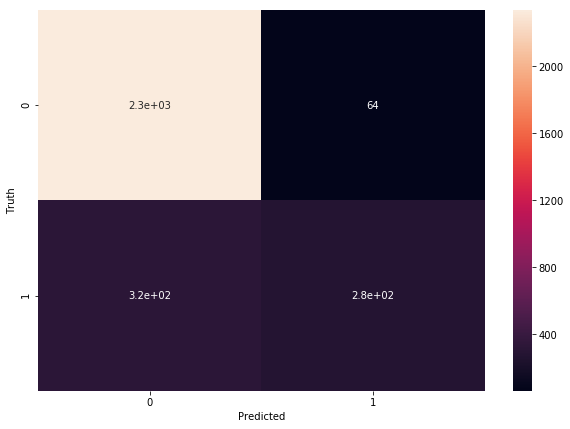

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
print('Classification Report:\n',classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2398
           1       0.81      0.47      0.59       602

   micro avg       0.87      0.87      0.87      3000
   macro avg       0.85      0.72      0.76      3000
weighted avg       0.87      0.87      0.86      3000

